In [404]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [405]:
# load csv file

file = "NBA_player_of_the_week.xls.csv"
file2 = "NBA MVP Summary.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
NBA_df2 = pd.read_csv(file2, encoding ="ISO-8859-1")
NBA_df = df.replace(np.nan, '', regex=True)




In [406]:
#Unique number of times a player names appears in Player of the Week data

Most_Player = NBA_df.Player.value_counts().head(10)

Most_Player

LeBron James        61
Kobe Bryant         33
Kevin Durant        26
Michael Jordan      25
Allen Iverson       23
Karl Malone         23
Tim Duncan          23
Shaquille O'Neal    20
Kevin Garnett       20
Dwyane Wade         19
Name: Player, dtype: int64

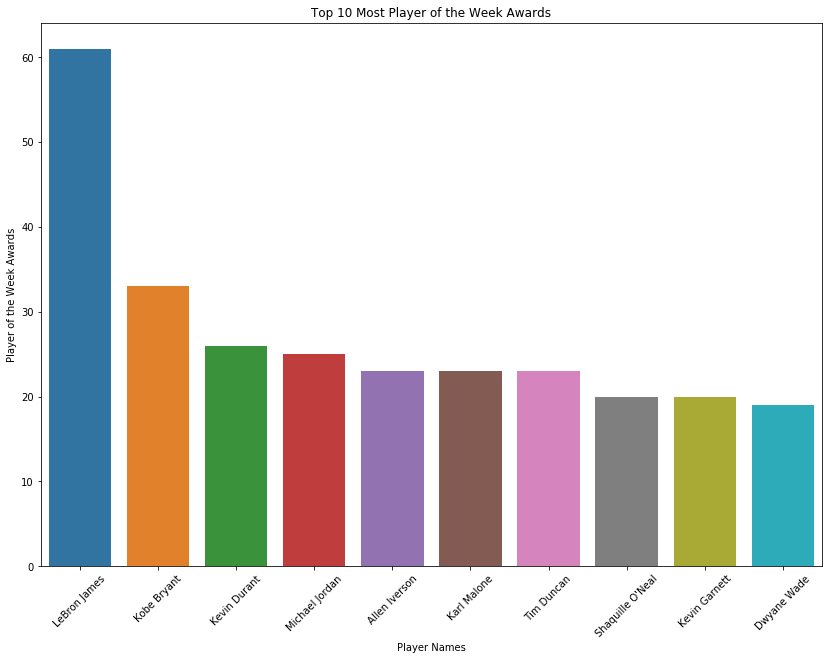

In [407]:
#Bar Chart of Top 10 Most Player of the Week Awards

plt.figure(figsize=(14,10))
sns.barplot(x = Most_Player.index, y = Most_Player.values)
plt.title ("Top 10 Most Player of the Week Awards")
plt.xlabel ("Player Names")
plt.ylabel ("Player of the Week Awards")
plt.xticks (rotation=45)
plt.show
plt.savefig('Most NBA Player of Week.png')

In [408]:
#Show player of the week awarded by position

Position_df = df.Position.value_counts()

Position_df

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

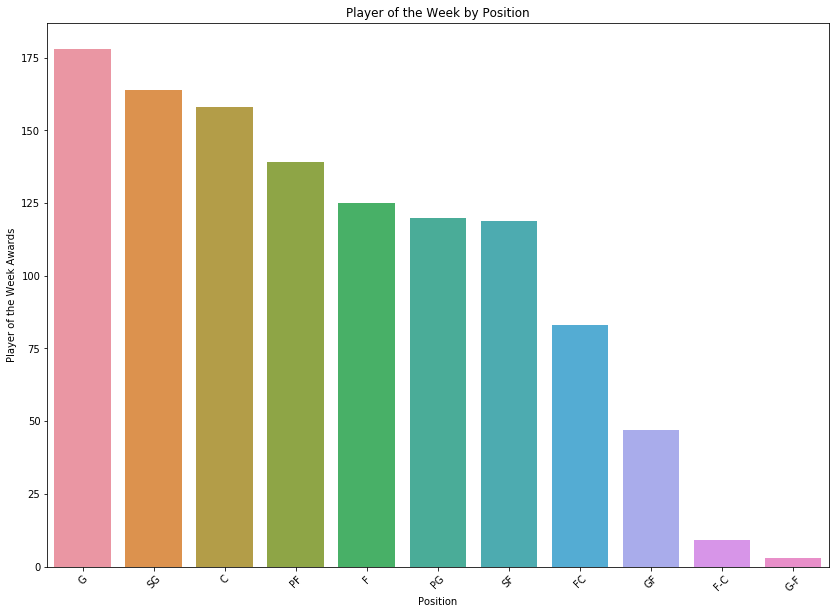

In [409]:
#Bar chart for Player of the Week Awards by Position

plt.figure(figsize=(14,10))
sns.barplot(x = Position_df.index, y = Position_df.values)
plt.title ("Player of the Week by Position")
plt.xlabel ("Position")
plt.ylabel ("Player of the Week Awards")
plt.xticks (rotation=45)
plt.show
plt.savefig('Player of the Week by Position.png')



In [410]:
#Show sample of MVP dataset

NBA_df2.head()

,Player,Lg,Count
0,Kareem Abdul-Jabbar,NBA,6
1,Michael Jordan,NBA,5
2,Bill Russell,NBA,5
3,Wilt Chamberlain,NBA,4
4,LeBron James,NBA,4


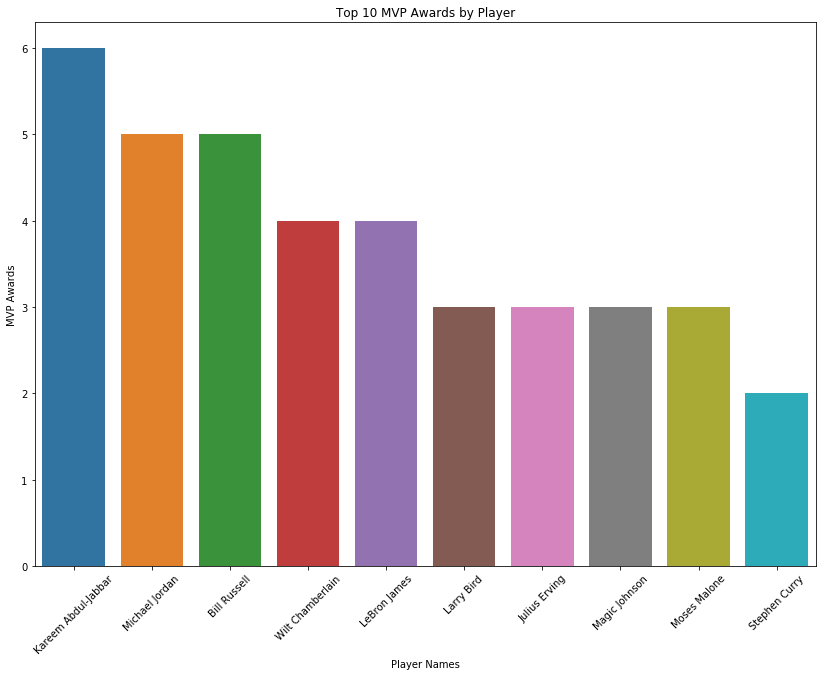

In [396]:
#Barchart of Top 10 MVP

NumberMVP = NBA_df2.Count.head(10)
PlayerMVP = NBA_df2.Player.head(10)


plt.figure(figsize=(14,10))
sns.barplot(x = PlayerMVP.values, y = NumberMVP.values)
plt.title ("Top 10 MVP Awards by Player")
plt.xlabel ("Player Names")
plt.ylabel ("MVP Awards")
plt.xticks(rotation=45)
plt.show
plt.savefig('MVP Awards.png')

In [434]:
#Group Player of the Week Data and set it up for merging

NBA_df_groupby = NBA_df.groupby('Player')

Most_Player_Of_Week = NBA_df_groupby[['Date']].nunique()

Most_Player_Of_Week

,Date
Player,
Aaron McKie,1
Adrian Dantley,1
Al Harrington,1
Al Horford,3
Al Jefferson,7
Alex English,4
Allan Houston,1
Allen Iverson,23
Alonzo Mourning,6


In [435]:
#Merge MVP and Player of the Week Data

MergeMVP = Most_Player_Of_Week.merge(NBA_df2, on='Player', how='inner')


MergeMVP.head()


,Player,Date,Lg,Count
0,Allen Iverson,23,NBA,1
1,Charles Barkley,11,NBA,1
2,David Robinson,15,NBA,1
3,Derrick Rose,5,NBA,1
4,Dirk Nowitzki,16,NBA,1


Text(0,0.5,'MVP Awards')

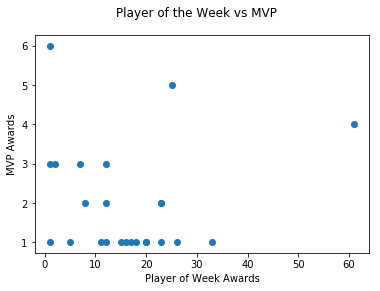

In [437]:
#Scatterplot to show relationship between Player of the Week and MVP data

x_mvp = MergeMVP['Count']
y_mvp = MergeMVP['Date']

plt.scatter(y_mvp, x_mvp, marker = "o")
plt.suptitle("Player of the Week vs MVP")
plt.xlabel("Player of Week Awards")
plt.ylabel("MVP Awards")
